In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images,test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


170498071/170498071 [==============================] - 233s 1us/step


In [5]:
#creating cnn artitecture
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
hisotry = model.fit(train_images,train_labels,epochs=3,validation_data=(test_images,test_labels))

Epoch 1/3
1563/1563 [==============================] - 49s 29ms/step - loss: 1.5426 - accuracy: 0.4399 - val_loss: 1.3001 - val_accuracy: 0.5377
Epoch 2/3
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1644 - accuracy: 0.5884 - val_loss: 1.1145 - val_accuracy: 0.6090
Epoch 3/3
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0103 - accuracy: 0.6453 - val_loss: 1.0382 - val_accuracy: 0.6312


In [10]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 3s - loss: 1.0382 - accuracy: 0.6312 - 3s/epoch - 11ms/step
0.6312000155448914


<h2> working with small data <h2>

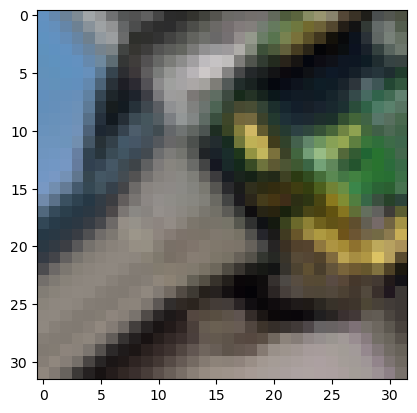

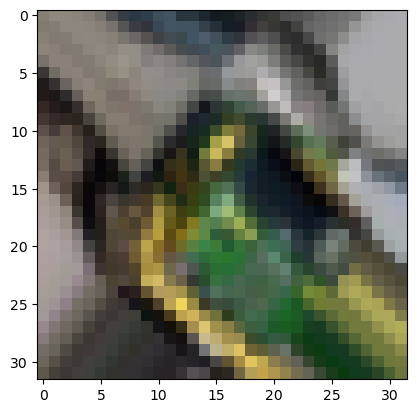

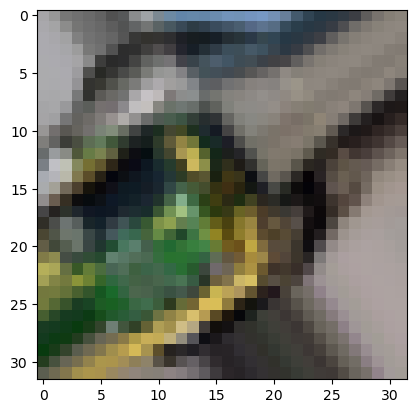

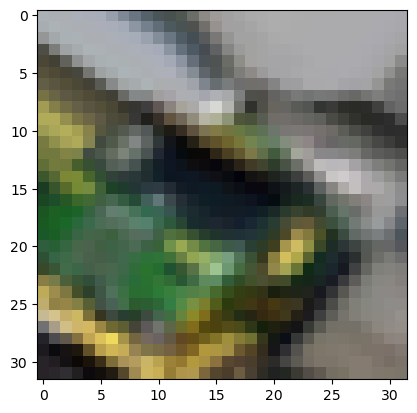

In [14]:
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i=0

for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [2]:
import tensorflow_datasets as tfds

(raw_train,raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

In [ ]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [1]:
IMG_SIZE = 160

def format_example(image,label):
    image = tf.cast(image,tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    return image,label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
for image,label in train.take(2):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [ ]:
IMG_SHAPE = (IMG_SIZE,IMG_SIZE,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
gobal_avergae_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
predicrition_layer = keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [ ]:
model.summary()

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics=['accuracy'])

In [ ]:
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation,steps=validation_steps)

In [ ]:
history = model.fit(train,epochs=initial_epochs,validation_data=validation)
acc = history.history['accuracy']
print(acc)

In [ ]:
model.save("dogs_cats.h5")
new_model = tf.keras.models.load_model('dogs_cats.h5')
model.predict(test)